# 6주

### * 비지도 학습
- Row data를 이용하여 출력값, 정보없이 학습 알고리즘을 적용해야하는 모든 종료의 머신러닝이다.
- 비지도 변환(unsupervised tranformation)
- 군집(clustering)

#### * 데이터 전처리와 스케일 조정
- 데이터를 머신러닝 하기 적합한 형태로 만드는 데이터 전처리
- 범위에 맞게 데이터값을 변환하는 스케일링

#### [ 데이터 변환 실습 ]

In [3]:
# 입력이 있다 -> 처리 -> 결과도 있다. = 지도 학습
# 입력이 있다 -> 주어진 것이 없다 -> 결과가 비어있다. = 비지도 학습

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
# 특성에 대해서 정확하게 0과 1사이에 위치하도록 데이터를 변경하는 동작을 수행한다.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)
# 훈련 세트에 있는 특성마다 최대, 최소값 계산

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
X_train_scaled = scaler.transform(X_train)

print("변환된 후 크기 : ", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값 \n : ", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값 \n : ", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값 \n : ", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 \n : ", X_train_scaled.max(axis=0))

변환된 후 크기 :  (426, 30)
스케일 조정 전 특성별 최소값 
 :  [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 
 :  [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 
 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 
 :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성별 최소값 \n : ", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 \n : ", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값 
 :  [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값 
 :  [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [10]:
# => 훈련 세트의 최소값을 제외하고 훈련세트의 범위로 조절한다.

# 　

### * 주성분 분석(PCA)
- 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 잘 드러나는 표현을 찾기 위해서이다.

#### 정의
- 데이터 변수를 줄이려고 사용하는 방법
- 변수 사이에 상관관계가 있는 데이터에 적용할 수 있는 대표적인 차원 축소 방법
- 다변량(종속변수가 여러개 있는) 데이터를 분석할 때 복잡성 감소에 도움된다.
- 변수를 줄이는 방법으로 원본 데이터에 있는 변수에서 새로운 변수를 구성하는 방법을 사용한다.
- 높은 차원에서 나타나는 데이터를 더 낮은 차원의 변수로 나타내고 이 낮은 차원의 축이 바로 주성분이다.

#### 방향과 중요도
- 주성분 분석에 필요하다.
- 산점도에 주성분 분석을 적용하여 직교하는 선 2개를 그린다.
- 선의 방향 : 데이터의 방향 / 길이 : 데이터의 중요도
- 데이터 방향 : 새로운 변수를 구성할 때 해당 데이터의 변수에 어느 정도 가중치를 부여하느냐에 따라 결정된다.
- 데이터 중요도 : 변수의 변화와 관계, 데이터 포인트 중 값이 같은 변수보다 값이 다른 변수가 데이터 전체의 정보를 나타낸다고 생각될 때 사용한다.

#### 고유 얼굴(eigenface) 특성 추출
- 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있다
- 주성분 분석을 적용하여 특징 벡터를 구하고 각각의 특징들을 대상으로 유클리디안 거리를 비교하여 인식

[데이터 변환에 사용되는 알고리즘의 종류]
- 주성분 분석(PCA) : 가장 간단하고 흔히 사용한다.
- 비음수 행렬 분해(MNF) : 특성 추출에 널리 사용된다.
- t-SNE : 2차원 산점도를 이용해 시각화 용도로 많이 사용된다.

#### [ 주성분 분석 실습 ]

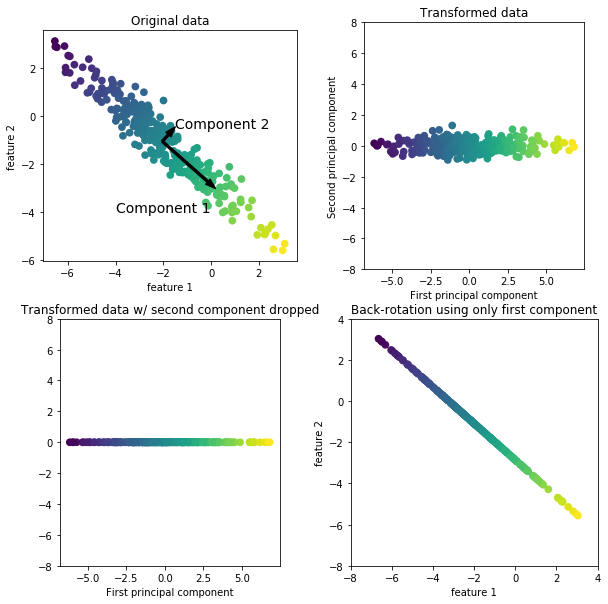

In [13]:
# 비지도 학습에서 데이터 전처리 부분(변환)에서 사용되는 알고리즘
# -> 주성분 분석(PCA)로 나타낼 수 있다.
import mglearn

mglearn.plots.plot_pca_illustration()

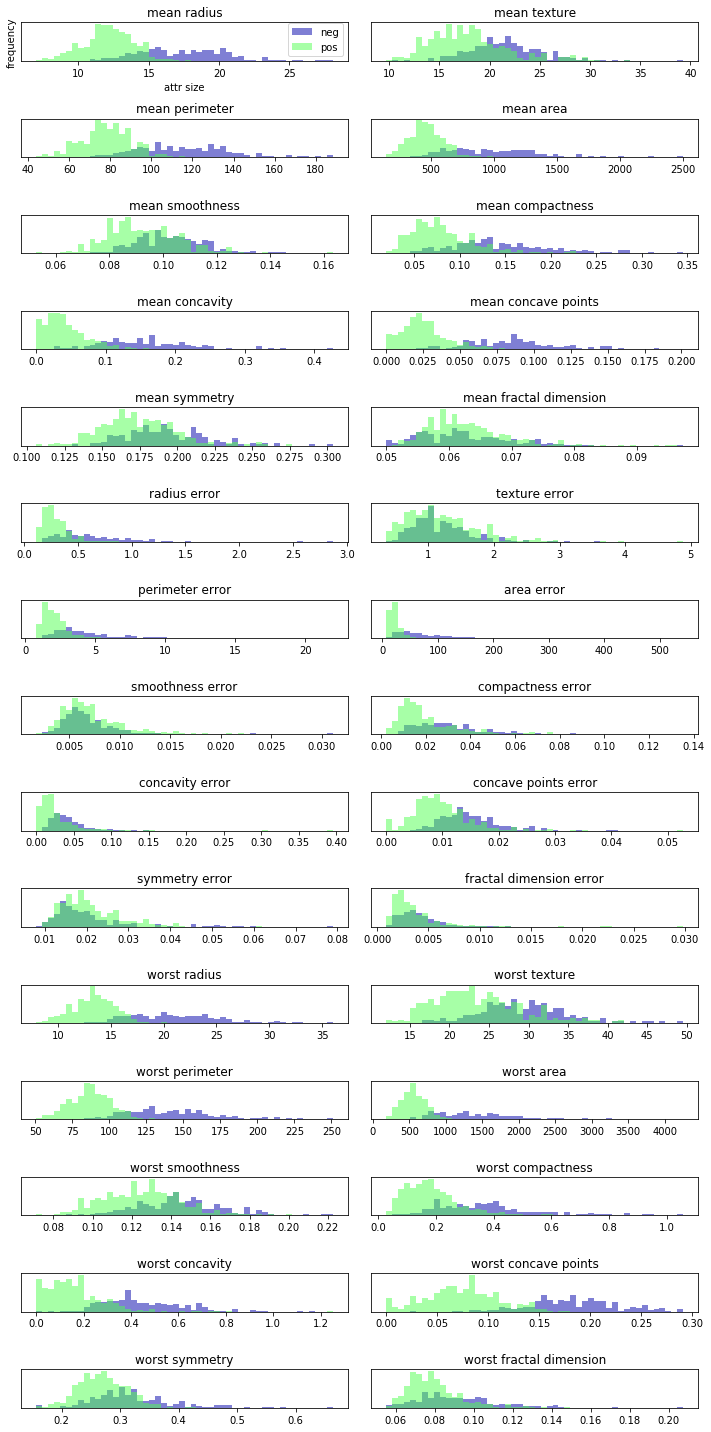

In [17]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cacner = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()
# 특성별로 히스토그램을 적용하여 양성, 악성클래스에 대해 만드는 것


for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cacner.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("attr size")
ax[0].set_ylabel("frequency")
ax[0].legend(["neg", "pos"], loc="best")
fig.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

standard_scaler = StandardScaler()
standard_scaler.fit(cancer.data)

X_scaled = standard_scaler.transform(cancer.data)

In [23]:
from sklearn.decomposition import PCA

# 한글 사용
plt.rc('font', family='Malgun Gothic')

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


Text(0, 0.5, '두번째 주성분')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


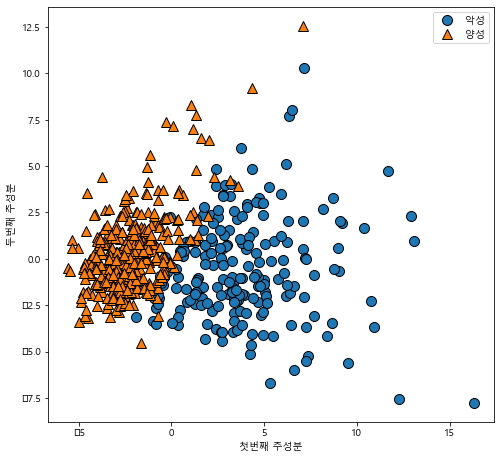

In [25]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)

plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")

In [26]:
print("PCA 주성분 형태 : ", pca.components_.shape)
# 중요도에 따라 정렬된다

PCA 주성분 형태 :  (2, 30)


In [27]:
print("PCA 주성분 : ", pca.components_)

PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

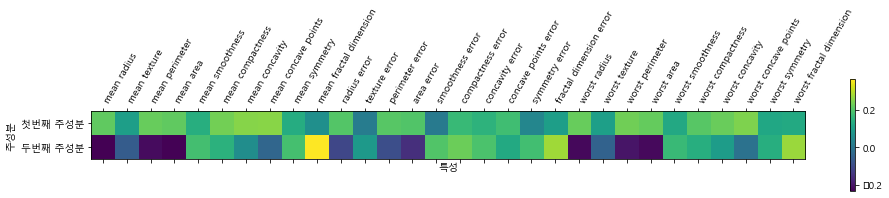

In [29]:
# 시각화하기
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1], ["첫번째 주성분", "두번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

# 　

### * 비음수 행렬 분해(NMF)
- 유용한 특성을 뽑아내기 위한 비지도학습 알고리즘이다.
- 행렬 분해 방법 중 하나이다.
- PCA와 유사하고 차원 축소에도 사용 가능하다.
- PCA에서는 데이터의 분삭이 가장 크고 수직인 성분을 찾았다면 비음수 행렬 분해에서는 음수가 아닌 성분과 계수 값을 찾는다.

#### 사용분야
- 컴퓨터 비전, 텍스트 마이닝, 추천시스템
- 잠재 의미 분석이 어떤 행렬의 잠재 변수를 알아낸다면, 비음수 행렬분해는 원본 행렬의 성분이 모두 양수(0)이상일때만 적용하는 알고리즘이다.

#### 특징
- 원래 형렬 요소가 양수이다.
- 행렬 분해 후 행렬 요소가 양수이다.
- 잠재 의미 공간의 차원 각각이 직교한다는 제약이 없다.

#### 장점
- 분석 결과의 쉬운 설명
- 잠재 변수가 직교한다는 제약이 없으므로 잠재 변수 각가에 어느 정도 중복 정보 존재
- => 실제 데이터를 반영한 모델을 만들 수 있다는 의미

### * 매니폴드 학습
- 비선형 데이터의 차원 축소 방법
- 매니폴드 : 다양체라고도 하며, 수학에서 사용하는 개념이다. 전체 데이터 중 어떤 일부분에 주목하여 변형이 없는 것으로 다루는 공간이라는 뜻으로 예를 들면 지구가 구형이라도 한국만 나타낼 때는 평면 지도를 사용하는 것과 같은 개념이다.
- 매니폴드 학습을 통해 높은 차원 공간에 숨은 더 낮은 차원의 데이터 구조를 찾을 수 있다.
- -> 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공한다.
- 시각화가 목적이라 3개 이상의 특성을 뽑지 않는다
- -> 새로운 데이터에 적용하기 불가능하다.

### * t-SEN 알고리즘
- 매니폴드 학습에 많이 사용되는 알고리즘이다.
- 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것이다.
- 각 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트를 가깝게, 멀리 떨어진 포인트는 멀어지게 만든다.
- 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둔다.

#### [ 비음수 행렬 분해(NMF)와 매니폴드 학습 실습 ]

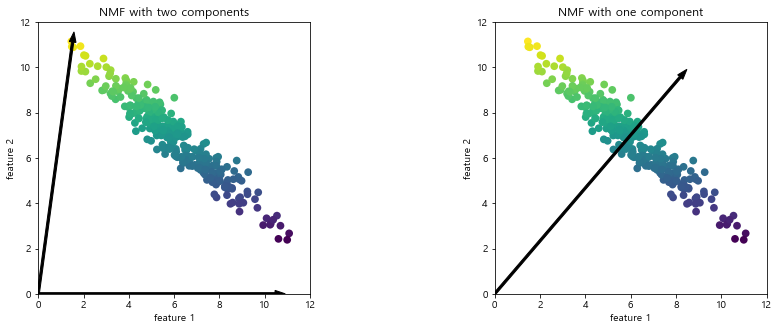

In [31]:
# 비음수 행렬 분해(NMF) - 특성 추출에 효율적이다.
# 예) 음성파일 -> 원하는 주파수에 해당하는 소리만 추출할 때 사용한다.
import matplotlib.pyplot as plt
import mglearn

mglearn.plots.plot_nmf_illustration()

plt.show()

In [33]:
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

image_shape = people.images[0].shape

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


C:\Users\user\anaconda3\lib\site-packages\mglearn\plot_nmf.py:71: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  reduced_images = nmf_faces(X_train, X_test)


____________________________________________________nmf_faces - 3814.3s, 63.6min


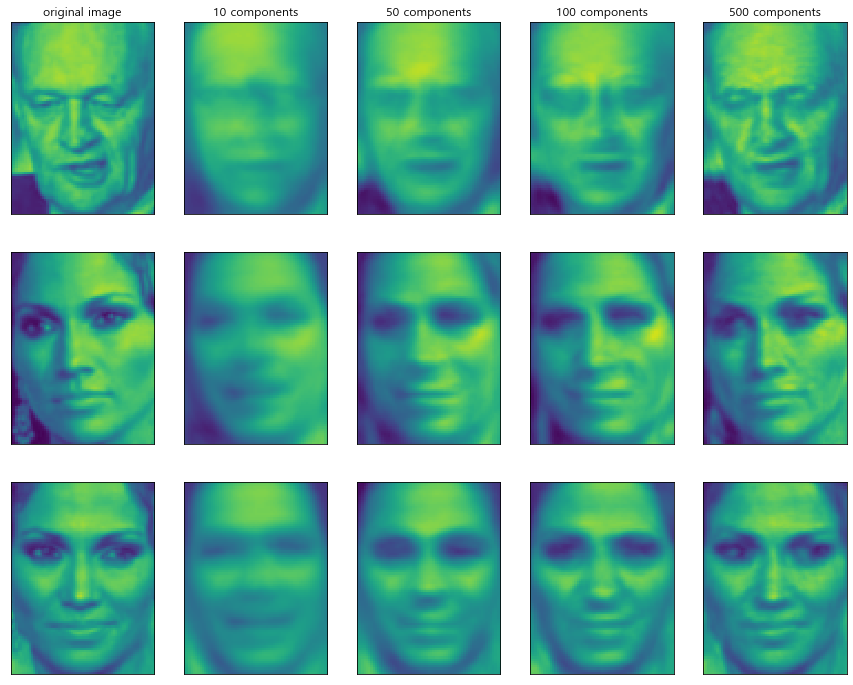

In [34]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

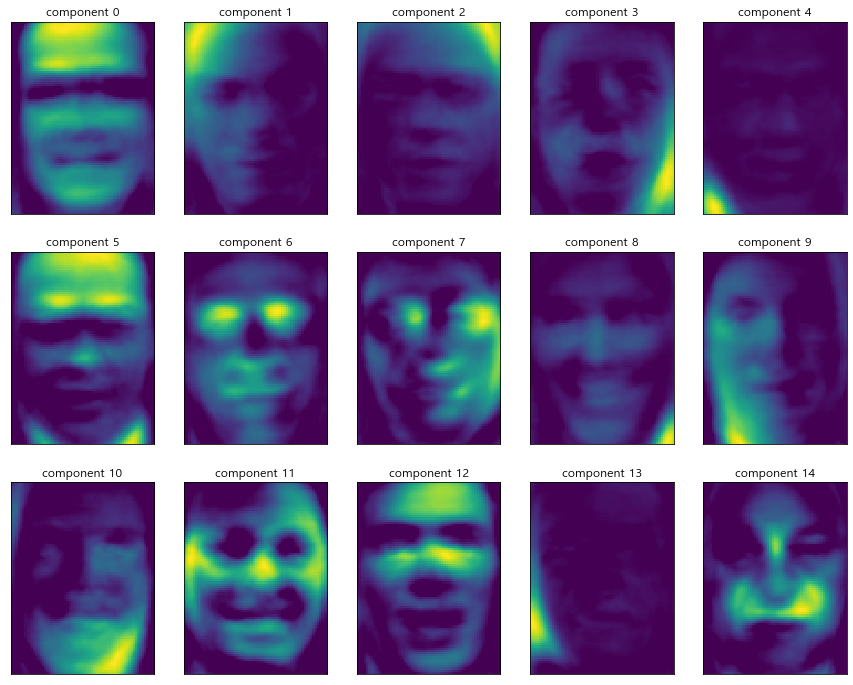

In [37]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("component {}".format(i))

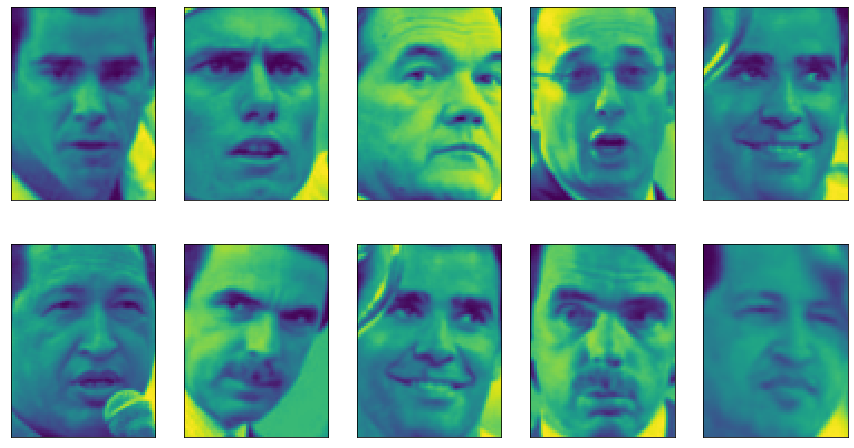

In [38]:
# 4번째 성분으로 정렬하여 이미지 분석
compn = 3 # 방향에 따른 계수
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

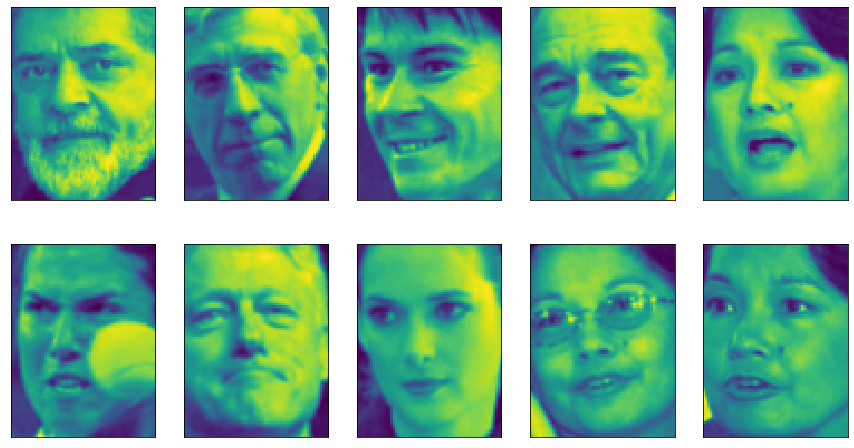

In [39]:
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
# 이미지의 얼굴이 위 코드보다 왼쪽으로 돌아가 있는 것을 알 수 있다.

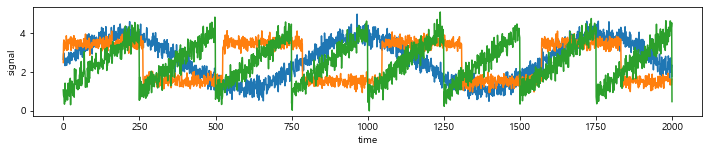

In [40]:
S = mglearn.datasets.make_signals()

plt.figure(figsize=(12,2))
plt.plot(S,'-')
plt.xlabel("time")
plt.ylabel("signal")

plt.show()

In [43]:
S = mglearn.datasets.make_signals()

A = np.random.RandomState(0).uniform(size=(100,3))

X = np.dot(S, A.T)

print("측정 데이터 형태 : {}".format(X.shape))

측정 데이터 형태 : (2000, 100)


In [44]:
from sklearn.decomposition import PCA

nmf = NMF(n_components=3, random_state=42, max_iter=7000)
S_ = nmf.fit_transform(X)

print("복원한 신호 데이터 형태 : {}".format(S_.shape))

복원한 신호 데이터 형태 : (2000, 3)


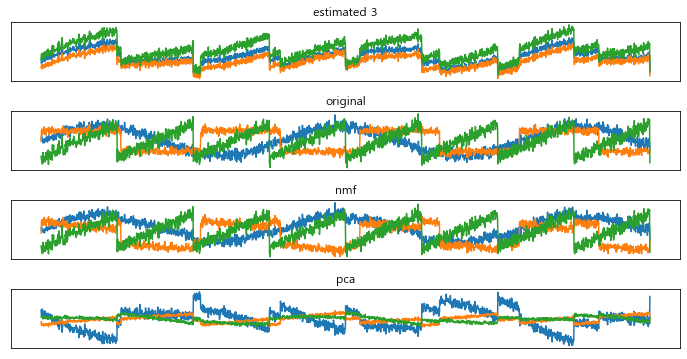

In [45]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
models = [X, S, S_, H]
names = ['estimated 3', 'original', 'nmf', 'pca']

fig, axes = plt.subplots(4, figsize=(12, 6), gridspec_kw={'hspace':0.5}, subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3], '-')

plt.show()